In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the file from csv file to Pandas DataFrame
df=pd.read_csv(r"Housing.csv")

In [3]:
# first five rows of DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#number of rows in the Columns
df.shape

(545, 13)

In [5]:
#getting some information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* categorical features:
* mainroad
* guestroom  
* basement
* hotwaterheating
* airconditioning  
* preferea
* furnishingstatus







In [6]:
#checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#statistical Measures of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


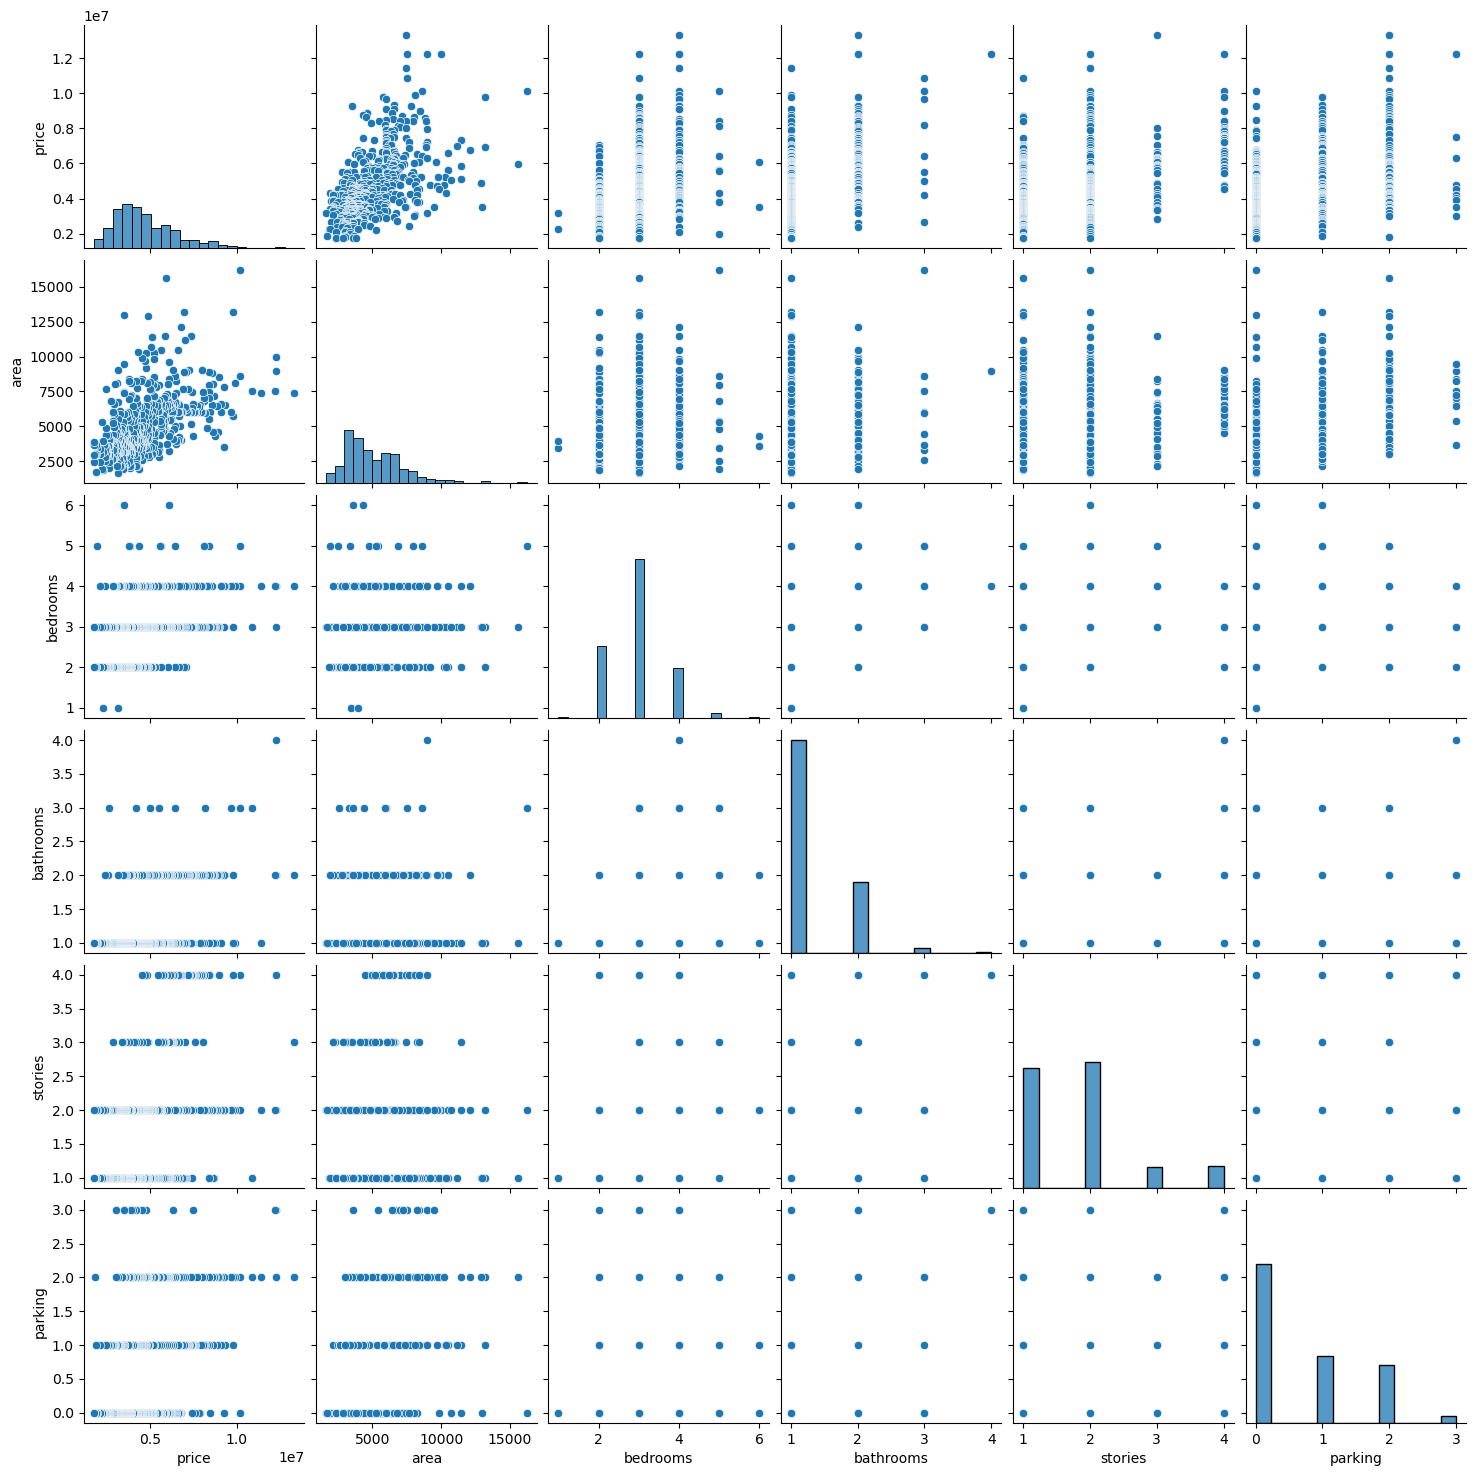

In [8]:
sns.pairplot(data=df)

In [9]:
#checking for columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

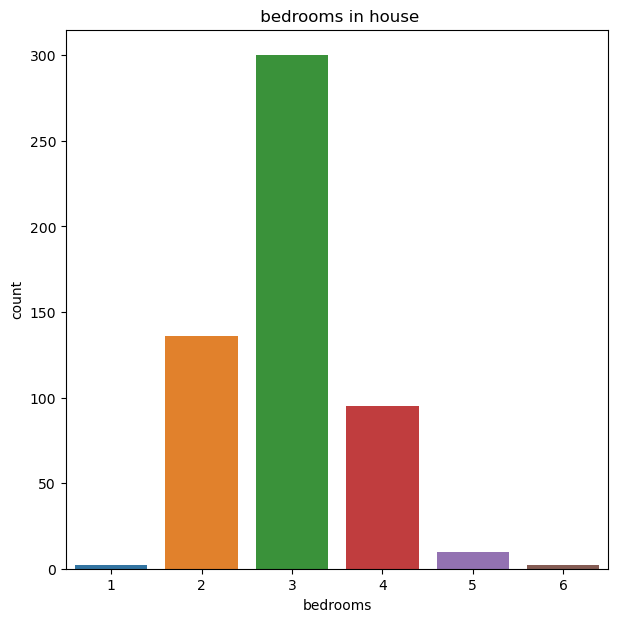

In [10]:
#bedroom is the house
plt.figure(figsize=(7,7))
sns.countplot(x="bedrooms",data=df)
plt.title(" bedrooms in house")
plt.show()

In [11]:
#checking value
df["bedrooms"].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

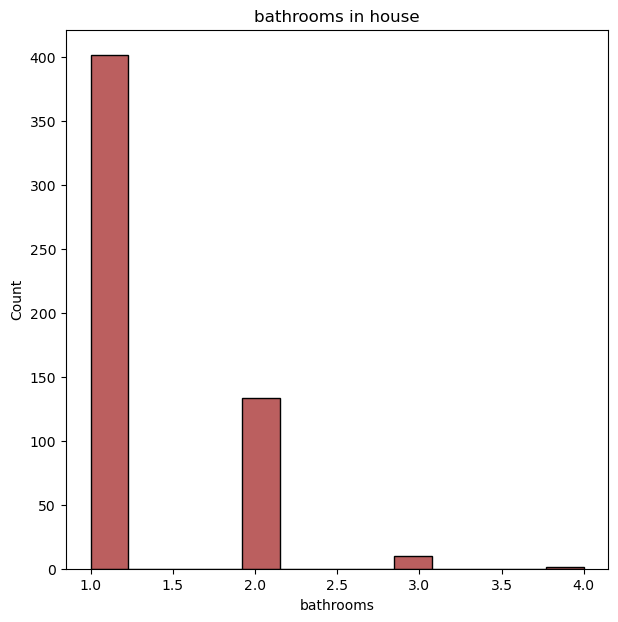

In [12]:
#bathrooms in house
plt.figure(figsize=(7,7))
sns.histplot(x="bathrooms",data=df,color="brown")
plt.title("bathrooms in house")
plt.show()

In [13]:
#checking for the value counts of bathrooms
df["bathrooms"].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

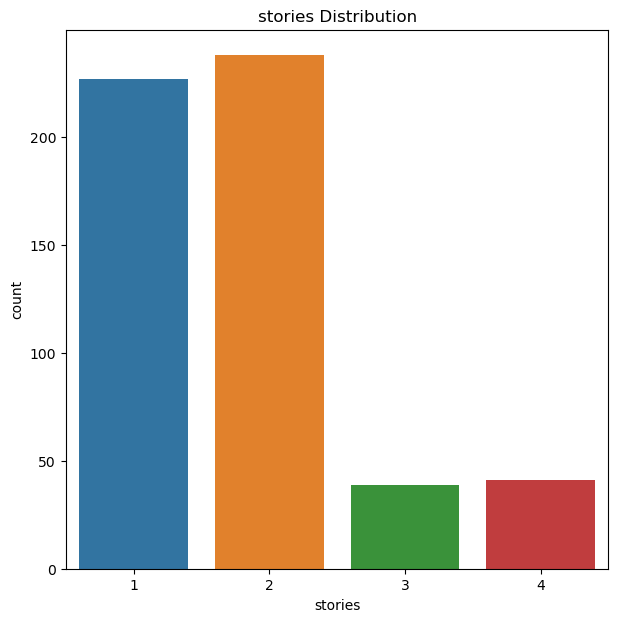

In [14]:
#stories distribution
plt.figure(figsize=(7,7))
sns.countplot(x='stories',data=df)
plt.title('stories Distribution')
plt.show()

In [15]:
#checking for the value counts of stories
df["stories"].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

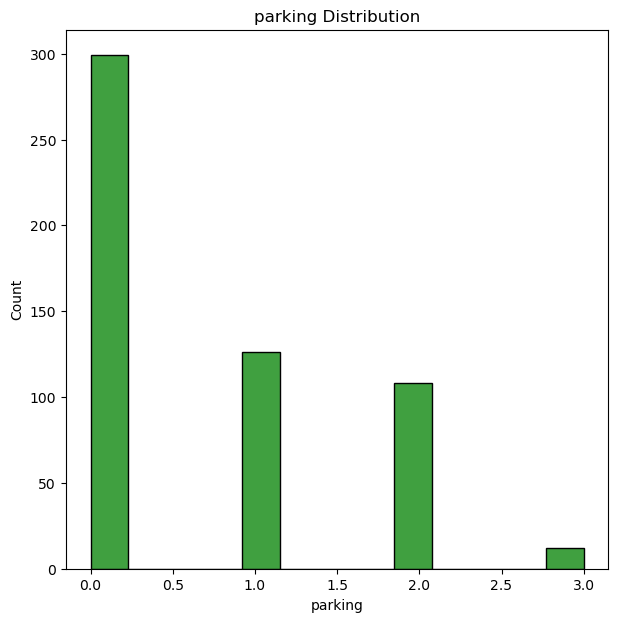

In [16]:
#parking column
plt.figure(figsize=(7,7))
sns.histplot(x='parking',data=df,color="green")
plt.title('parking Distribution')
plt.show()

In [17]:
#checking for the value counts of parking
df["parking"].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

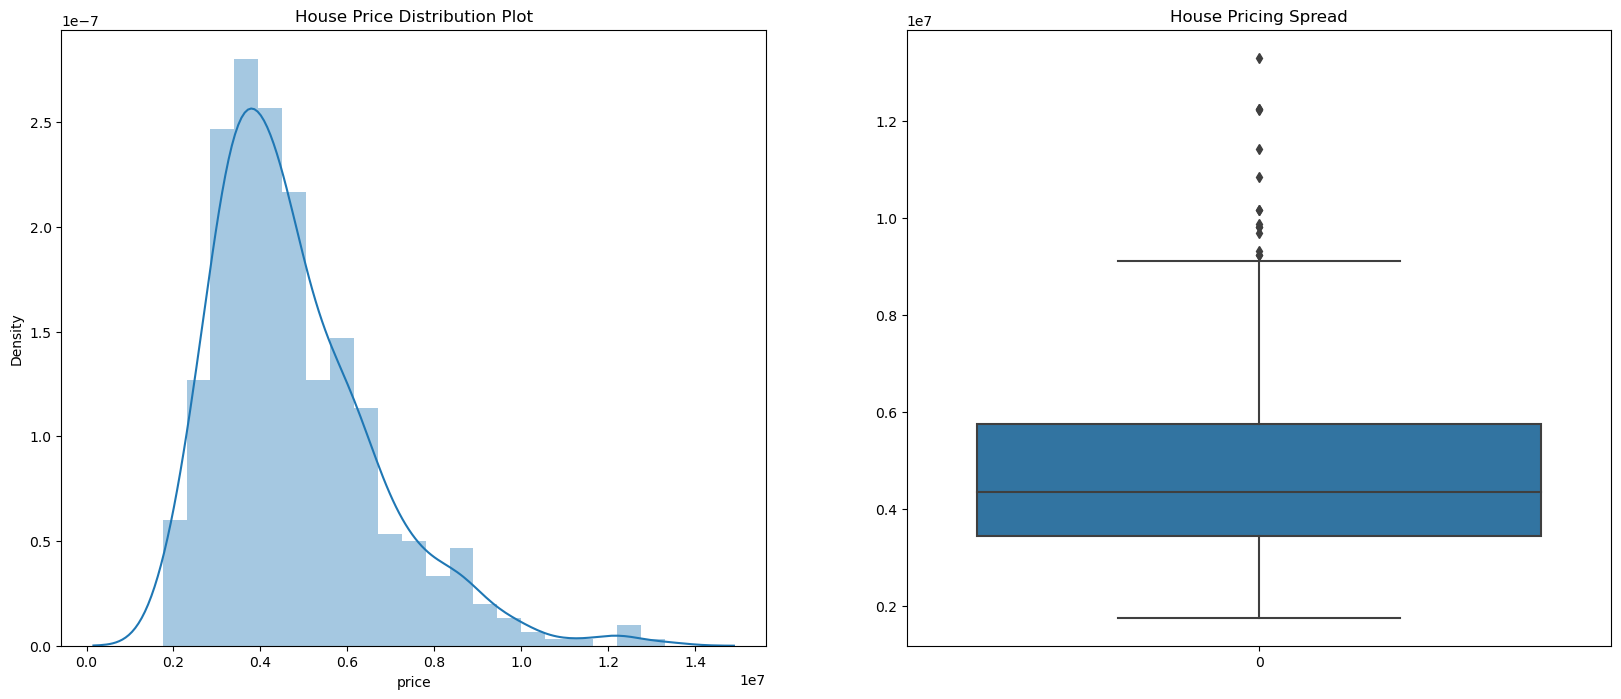

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

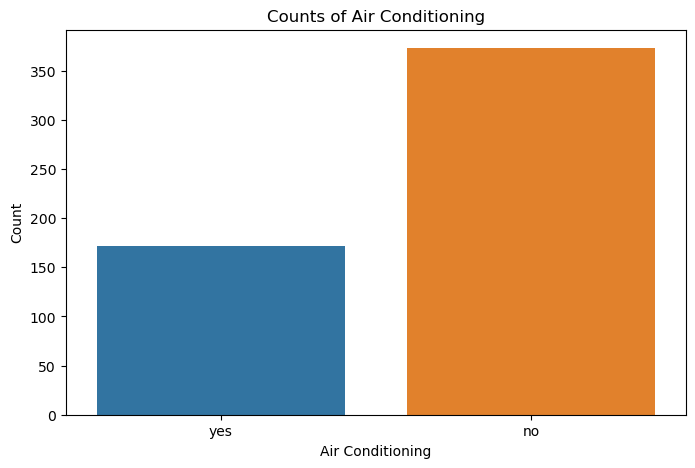

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=df)
plt.title('Counts of Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

In [20]:
encoded_data = pd.get_dummies( df,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
encoded_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

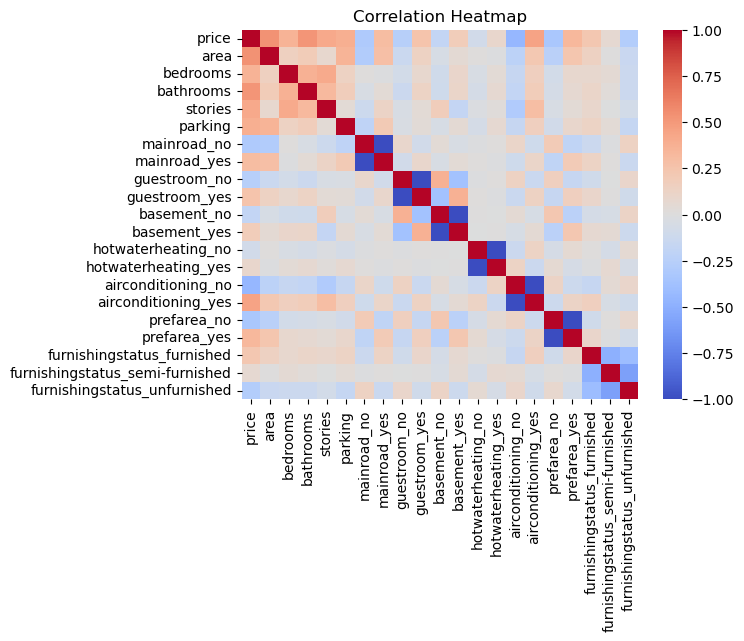

In [21]:
sns.heatmap(encoded_data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

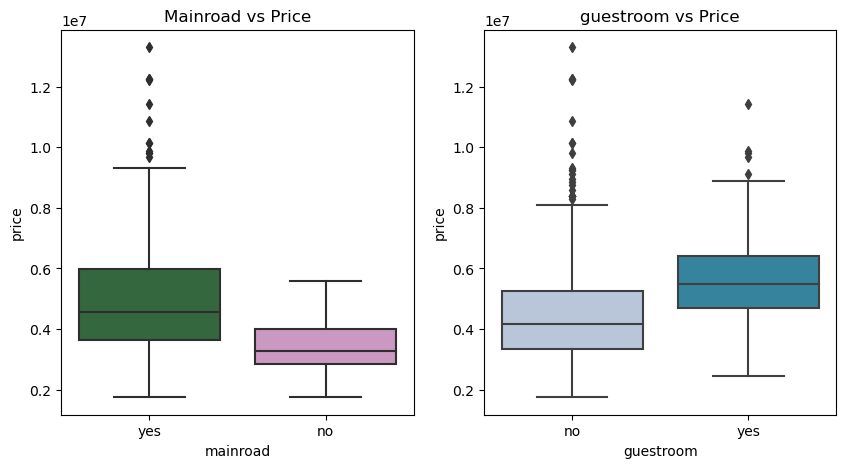

In [22]:
#distribution between mainroad vs price
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

In [23]:
df.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],axis=1,inplace=True)

Splitting the Features and Target

In [24]:
X = df.drop(columns='price', axis=1)
Y = df['price']

In [25]:
print(X)

     area  bedrooms  bathrooms  stories  parking
0    7420         4          2        3        2
1    8960         4          4        4        3
2    9960         3          2        2        2
3    7500         4          2        2        3
4    7420         4          1        2        2
..    ...       ...        ...      ...      ...
540  3000         2          1        1        2
541  2400         3          1        1        0
542  3620         2          1        1        0
543  2910         3          1        1        0
544  3850         3          1        2        0

[545 rows x 5 columns]


In [26]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


Model Training

Linear Regression

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.sample(10)

In [ ]:
#loading standard scaler model
from sklearn.preprocessing import StandardScaler
#creating an instance of standardscaler
sc= StandardScaler()

Splitting the Data into Training Data and Testing Data

In [28]:
from sklearn.model_selection import train_test_split

In [96]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [97]:
print(X.shape,Xtrain.shape,Xtest.shape)

(545, 5) (436, 5) (109, 5)


In [98]:
#loading the Linear Regresssion model
from sklearn.linear_model import LinearRegression

In [99]:
#creating an instance of model
lr=LinearRegression()
#training a model
lr.fit(Xtrain,Ytrain)
#predicting value
ypred=lr.predict(Xtest)

In [100]:
Xtest

,area,bedrooms,bathrooms,stories,parking
333,3000,3,1,2,0
84,3760,3,1,2,2
439,3930,2,1,1,0
396,3640,2,1,1,1
161,6100,3,1,3,0
...,...,...,...,...,...
100,6600,3,2,1,0
344,3850,2,1,1,0
176,8520,3,1,1,2
244,5320,3,1,2,0


In [101]:
ypred

array([ 3486752.30642128,  4477412.7316256 ,  3175737.26207861,
        3427025.33877111,  5122906.66385852,  4778363.13612159,
        3635383.71906957,  3614237.00428453,  3618213.48647094,
        4591154.71105006,  4567849.4836062 ,  3154584.28712816,
        4581633.56032324,  4334734.60751339,  4936396.54302836,
        6475729.80262104,  6424781.0827362 ,  4247277.62988354,
        3019113.20470376,  4149633.83621514,  5289793.52915205,
        4260475.8341512 ,  5422329.99648617,  5978912.44229686,
        2804210.4283057 ,  2946966.35060801,  3215803.88140706,
        4564830.8101604 ,  6601770.5173505 ,  3295525.2596264 ,
        3848050.18461869,  2902164.58535892,  3443043.26715388,
        5925725.41689086,  4580848.73854317,  7141591.10676565,
        2906899.73127956,  6561699.63252887,  5150591.51457774,
        3735914.50938459,  7789080.26097987,  3996691.09787429,
        3011828.36482586,  5149927.84393826,  4062215.75768034,
        3694370.24294144,  3618213.48647

In [102]:
from sklearn.metrics import r2_score

r2_score(Ytest,ypred)

0.5667567951811983

In [105]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/99.8 MB 5.5 MB/s eta 0:00:18
   ---------------------------------------- 0.9/99.8 MB 8.1 MB/s eta 0:00:13
    --------------------------------------- 1.5/99.8 MB 9.3 MB/s eta 0:00:11
    --------------------------------------- 2.0/99.8 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 2.5/99.8 MB 10.0 MB/s eta 0:00:10
   - -------------------------------------- 3.1/99.8 MB 10.2 MB/s eta 0:00:10
   - -------------------------------------- 3.6/99.8 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 4.1/99.8 MB 11.0 MB/s eta 0:00:09
   - ------------------------------

In [106]:
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

In [107]:
# loading the model
model = XGBRegressor()

In [109]:
# training the model with X_train
model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
# accuracy for prediction on training data
training_data_prediction = model.predict(Xtrain)

In [112]:
print(training_data_prediction)

[ 3420302.2  4237653.   2515418.2  4950223.   4099487.2  7345578.
  3087323.2  2766970.5  6928292.5  4597473.   3430693.8  3411721.5
  6122547.   5760622.   7658497.   3961564.8  5080206.5  4542765.
  7619728.5  4044779.2  4040915.5  3218254.8  5299501.   4416962.5
  3929403.   4279347.5  6774748.   9181800.   4621186.   3353261.8
  4061792.5  3177262.2  2595471.2  3917471.2  4395547.   3085494.5
  4860064.   3841533.8  2011461.1  7991436.   4053961.8 12132570.
  8518272.   7293174.5  4140822.8  3126925.2  4089616.2  3475126.
  3382802.5  2470844.2  5548034.5  4060728.5  3911440.   3422239.8
  4230979.   5389872.5  3652815.2  3794333.8  3750801.   4138126.5
  7345578.   4241929.5  6042503.5  3792662.8  3738665.5  5333687.
  6409431.   6012464.   5455705.5  5385725.   3286394.5  3693268.2
  2992060.8  4921562.5  5376638.5  3789208.5  5882819.   4168185.5
  6185529.5  5386382.5  2984277.8  3398643.8  6334564.5  4787313.
  5837654.5  8405725.   2759924.   3116894.   9721711.   4163814.5
 

In [124]:
# R squared error
score_1 = metrics.r2_score(Ytrain, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Ytrain, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9789071318644258
Mean Absolute Error :  169212.7396788991


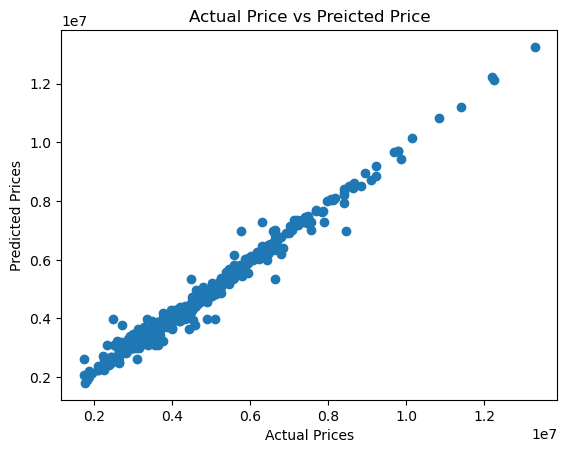

In [116]:
plt.scatter(Ytrain, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [118]:
# accuracy for prediction on test data
test_data_prediction = model.predict(Xtest)

In [125]:
# R squared error
score_1 = metrics.r2_score(Ytest, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Ytest, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.04430197392138813
Mean Absolute Error :  1294156.4678899082
